In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(-0.5, 1998.5, 1332.5, -0.5)

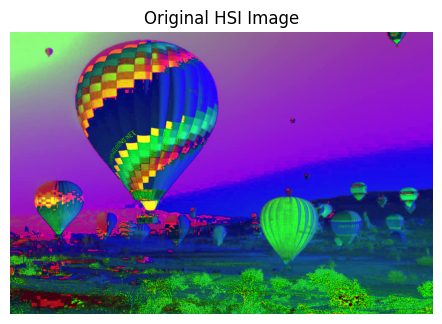

In [2]:


def rgb_to_hsi(rgb_image):
    rgb_image = rgb_image / 255.0
    R = rgb_image[:, :, 0]
    G = rgb_image[:, :, 1]
    B = rgb_image[:, :, 2]

    # Intensity
    I = (R + G + B) / 3

    # Saturation
    minimum = np.minimum(np.minimum(R, G), B)
    S = 1 - 3 * np.divide(minimum, R + G + B + 1e-6)

    # Hue
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G)**2 + (R - B) * (G - B))
    theta = np.arccos(np.clip(num / (den + 1e-6), -1, 1))
    H = np.zeros_like(R)
    H[B > G] = 2 * np.pi - theta[B > G]
    H[B <= G] = theta[B <= G]
    H = H / (2 * np.pi)  # Normalize to [0, 1]

    return np.stack([H, S, I], axis=-1)

# Picture RGB
rgb_image = plt.imread(r"C:\Users\yourk\Pictures\image1-9.jpg")
hsi_image = rgb_to_hsi(rgb_image)



# Display the into HSI
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(hsi_image, cmap='hsv') 
plt.title('Original HSI Image')
plt.axis('off')


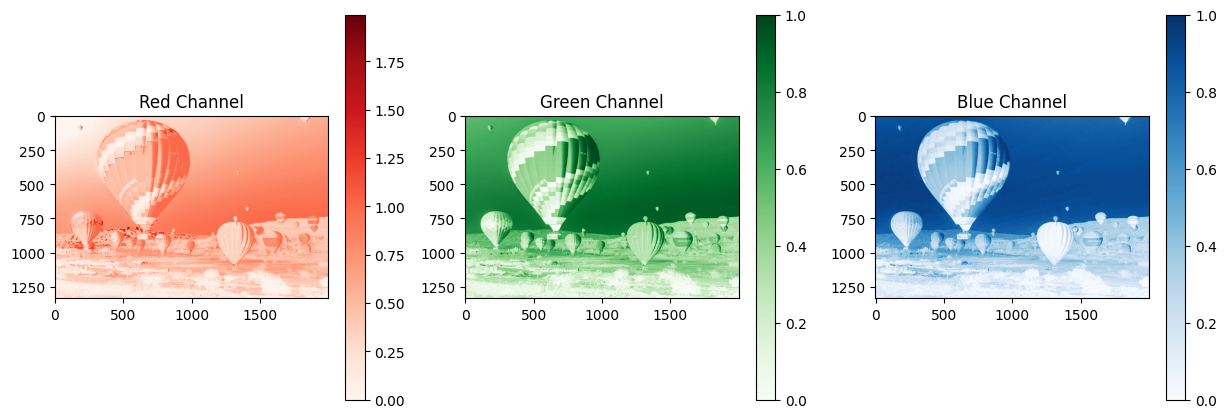

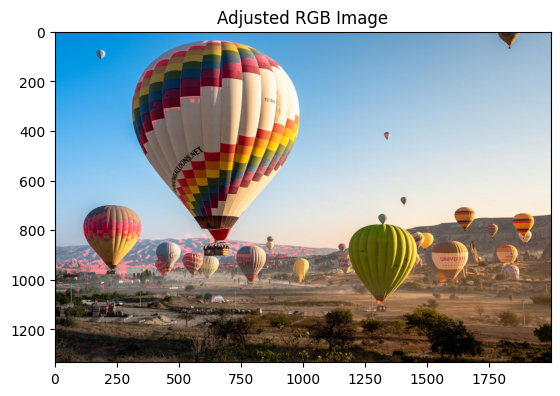

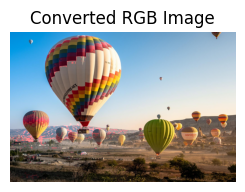

In [5]:
def hsi_to_rgb_numpy(hsi):
    H, S, I = hsi[:, :, 0], hsi[:, :, 1], hsi[:, :, 2]
    H = H * 2 * np.pi  # Convert H from range [0, 1] to [0, 2*pi]

    R, G, B = np.zeros(H.shape), np.zeros(H.shape), np.zeros(H.shape)
    # Calculate for different ranges of Hue
    hi = np.floor(H / (2 * np.pi / 3))
    f = H - hi * (2 * np.pi / 3)
    p = I * (1 - S)
    q = I * (1 - S * np.cos(f) / np.cos(np.pi / 3 - f))
    is_zero = (hi == 0)
    is_one = (hi == 1)
    is_two = (hi == 2)
    R[is_zero] = I[is_zero] + I[is_zero] * S[is_zero] * np.cos(f[is_zero]) / np.cos(np.pi / 3 - f[is_zero])
    G[is_zero] = 3 * I[is_zero] - R[is_zero] - p[is_zero]
    B[is_zero] = p[is_zero]
    R[is_one] = p[is_one]
    G[is_one] = I[is_one] + I[is_one] * S[is_one] * np.cos(f[is_one]) / np.cos(np.pi / 3 - f[is_one])
    B[is_one] = 3 * I[is_one] - G[is_one] - p[is_one]

    R[is_two] = 3 * I[is_two] - G[is_two] - p[is_two]
    G[is_two] = p[is_two]
    B[is_two] = I[is_two] + I[is_two] * S[is_two] * np.cos(f[is_two]) / np.cos(np.pi / 3 - f[is_two])

    factor_de_amplificación = 1

 
    R *= factor_de_amplificación
    G *= factor_de_amplificación
    B *= factor_de_amplificación

    rgb = np.stack([R, G, B], axis=-1)
    rgb = np.clip(rgb, 0, 1) 
    rgb = (rgb * 255).astype(np.uint8)  #




    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(R, cmap='Reds')
    plt.title('Red Channel')
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(G, cmap='Greens')
    plt.title('Green Channel')
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(B, cmap='Blues')
    plt.title('Blue Channel')
    plt.colorbar()
    plt.show()

        # Visualización ajustada
    plt.imshow(rgb)
    plt.title('Adjusted RGB Image')
    plt.show()


    return rgb


# Convert HSI to RGB
rgb_image = hsi_to_rgb_numpy(hsi_image)



plt.subplot(1, 2, 2)
plt.imshow(rgb_image)
plt.title('Converted RGB Image')
plt.axis('off')

plt.show()



